In [13]:
import pandas as pd
college=pd.read_csv('colleges.csv')
college

,Degree_class,University,Letter,Experienced,Hired
0,First,U0N,Good,Yes,Y
1,First,U0N,Good,Yes,Y
2,First,U0N,Good,Yes,Y
3,First,U0N,Good,Yes,Y
4,Second,U0N,Good,Yes,N
5,Second,MOI,Bad,Yes,Y
6,Second,JKUAT,Good,Yes,N
7,Second,JKUAT,Good,Yes,N
8,Second,JKUAT,Good,No,Y
9,First,UON,Good,No,Y


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encodeddata=college.apply(encoder.fit_transform)
college=encodeddata.values
college

array([[0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [1, 2, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 3, 1, 0, 1],
       [1, 3, 0, 0, 0]])

In [18]:
from sklearn.model_selection import train_test_split
training, testing=train_test_split(college, test_size=0.3, random_state=20)
print('Training data is:\n', training)
print('Testing data is:\n', testing)

Training data is:
 [[0 2 1 1 1]
 [0 2 1 1 1]
 [1 0 1 1 0]
 [1 3 0 0 0]
 [1 2 1 1 0]
 [0 3 1 0 1]
 [0 2 1 1 1]]
Testing data is:
 [[1 0 1 1 0]
 [0 2 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 1]]


In [20]:
#(e) Write the python code to separate independent variables from dependent variable and print the output.   

X=training[:, 0:4]
Y=training[:, -1]
print('Independent variables are:\n', X)
print('Dependent variables are:\n', Y)

Independent variables are:
 [[0 2 1 1]
 [0 2 1 1]
 [1 0 1 1]
 [1 3 0 0]
 [1 2 1 1]
 [0 3 1 0]
 [0 2 1 1]]
Dependent variables are:
 [1 1 0 0 0 1 1]


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(X_normalized)


[[0.         0.66666667 1.         1.        ]
 [0.         0.66666667 1.         1.        ]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         0.        ]
 [1.         0.66666667 1.         1.        ]
 [0.         1.         1.         0.        ]
 [0.         0.66666667 1.         1.        ]]


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


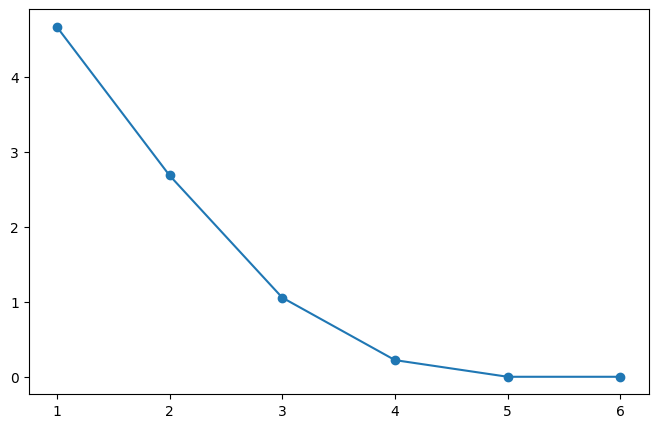

In [29]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
X=X_normalized
values=[]
for k in range(1, 7):
    kmeans=KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X)
    values.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 7), values, marker='o')


In [32]:
kmeans=KMeans(n_clusters=4, random_state=20)
kmeans.fit(X_normalized)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)

[1 1 0 2 0 3 1]
[[1.00000000e+00 3.33333333e-01 1.00000000e+00 1.00000000e+00]
 [5.55111512e-17 6.66666667e-01 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]]
